In [5]:
#Input NPM
NPM = "1706039364"

#Input NPM teman yang berkolaborasi dengan Anda dalam mengerjakan tugas ini
KOLABORATOR = []

#Input link referensi atau sumber lain yang Anda gunakan dalam menyelesaikan tugas ini
REFERENSI = ["https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac"]

## PR 2 Linear and Logistic Regression

#### Tugas ini terdiri dari 2 bagian:

* Implementasi (Score: 50)
    * [Soal 1 - Implementasi Linear Regression](#Soal-1)
    * [Soal 2 - Analisis Linear Regression](#Soal-2)
    * [Soal 3 - Implementasi Logistic Regression](#Soal-3)
    * [Soal 4 - Analisis Logistic Regression](#Soal-4)
* Demo program (Score: 50) (jadwal demo akan diumumkan via scele)
* Dataset yang digunakan untuk Linear Regression adalah insurance.csv dan untuk Logistic Regression adalah data yang sama dengan PR 1 yaitu pasien_liver.csv

* Berikut ketentuan pengerjaan PR 2:

   - Silahkan untuk menjawab di bagian <b># YOUR CODE HERE</b>

   - Jangan mengubah class dan method yang sudah ada, tetapi Anda dipersilahkan untuk menambah parameter, variabel, atau method baru jika diperlukan

   - Library yang boleh digunakan hanya Numpy, Pandas, dan Matplotlib 

   - Berikan penjelasan singkat mengenai code yang Anda buat

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [7]:
def is_similar(X, Y):
    if isinstance(X, list) and isinstance(Y, list):
        if len(X) == len(Y):
            return all([is_similar(x,Y[i]) for i,x in enumerate(X)])
        else:
            return False
    return abs(X-Y) <= 1e-7

## Soal 1 
### Linear Regression (20 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan Linear Regression untuk mencari hubungan antara atribut-atribut yang ada pada data dalam mempengaruhi harga self insurance seseorang
* Data yang digunakan memiliki 5 fitur, yaitu age, sex, bmi, children, smoke. Charges adalah variabel target yang akan diprediksi

In [155]:
data_linreg = pd.read_csv("insurance.csv") #load the dataset
data_linreg.head(10)

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0.0,yes,16884.92400
1,18,male,33.770,1.0,no,1725.55230
2,28,male,33.000,3.0,no,4449.46200
3,33,male,22.705,0.0,no,21984.47061
4,32,male,28.880,0.0,no,3866.85520
5,31,female,25.740,0.0,no,3756.62160
6,46,female,33.440,1.0,no,8240.58960
7,37,female,27.740,3.0,no,7281.50560
8,37,male,29.830,2.0,no,6406.41070
9,60,female,25.840,0.0,no,28923.13692


Silahkan melakukan preprocessing data. Beberapa preprocessing yang bisa dilakukan antara lain melakukan encode pada data kategori, menangani missing value, normalisasi data value, dan sebagainya

In [156]:
# PREPROCESSING DATA
# data_linreg
df = data_linreg.dropna()

# merubah nominal value ke numeric values
if (df['sex'].dtypes == 'O'):
    df['sex'][df['sex'] == "male"] = 1
    df['sex'][df['sex'] == "female"] = 0
if (df['smoker'].dtypes == 'O'):
    df['smoker'][df['smoker'] == "yes"] = 1
    df['smoker'][df['smoker'] == "no"] = 0

# standarisasi dataset 
df = (df-df.min())/(df.max()-df.min())
# normalisasi dataset
# df = (df - df.mean()) / df.std()

data_linreg = df
df.head()

c:\users\irfanazizalamin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\irfanazizalamin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\irfanazizalamin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD f

,age,sex,bmi,children,smoker,charges
0,0.021739,0,0.321227,0.0,1,0.251611
1,0.000000,1,0.479150,0.2,0,0.009636
2,0.217391,1,0.458434,0.6,0,0.053115
3,0.326087,1,0.181464,0.0,0,0.333010
4,0.304348,1,0.347592,0.0,0,0.043816


In [157]:
# Pembagian fitur dan label
features = data_linreg.drop(["charges"], axis=1).values
label = data_linreg['charges'].values

In [158]:
print(features)
print(label)

[[0.021739130434782608 0.0 0.3212267958030669 0.0 1.0]
 [0.0 1.0 0.479149852031208 0.2 0.0]
 [0.21739130434782608 1.0 0.4584342211460855 0.6 0.0]
 ...
 [0.0 0.0 0.5620123755716976 0.0 0.0]
 [0.06521739130434782 0.0 0.26472962066182404 0.0 0.0]
 [0.9347826086956522 0.0 0.35270379338175945 0.0 1.0]]
[0.25161076 0.00963595 0.05311516 ... 0.00810808 0.01414352 0.44724873]


Tanpa menggunakan library external, implementasikan fungsi hipotesis h(x)

$$ h(x) = w^Tx $$

dengan w adalah bobot dan x direpresentasikan sebagai list dengan panjang yang sama dengan w

In [159]:
# function untuk mencari hipotesis dari inputan x, dimana bobot sudah diketahui
def h(x):
    global w
    # YOUR CODE HERE
    return np.dot(np.asarray(w), x)
    raise NotImplementedError()

In [160]:
# code ini digunakan untuk memeriksa apakah fungsi h yang Anda implementasikan sudah sesuai
w, x = [1,2,3], [2,3,4]
assert is_similar(h(x),20)

w, x = [-1,-1,-1], [2,3,4]
assert is_similar(h(x),-9)

tanpa menggunakan library eksternal, gunakan h yang sudah diemplementasikan di atas untuk mengimplementasikan cost funtion $J(w)$ untuk Linear Regression

$$J(w) = \frac{1}{2}\sum_{i=1}^m (h_w(x^{(i)}) - y^{(i)})^2 $$

In [161]:
# function ini digunakan untuk mencari cost yang digunakan untuk
# mengukur seberapa dekat hyperplane linear ke semua data
def cost_func_linreg(X, y):
    m = len(y)
    # YOUR CODE HERE
    total = 0 
    for i in range(m):
        total += (h(X[i]) - y[i]) ** 2
    return total * (1/2)
    raise NotImplementedError()

In [162]:
# code ini digunakan untuk memeriksa apakah cost function yang Anda implementasikan sudah sesuai
w, X, y = [-1, 0], [[1,1],[0,1]], [-1,0]
assert is_similar(cost_func_linreg(X,y),0)

w, X, y = [1, 1, 2], [[1,1,1],[0,0,0]], [0,0]
assert is_similar(cost_func_linreg(X,y),8)

tanpa menggunakan library eksternal, gunakan cost function di atas untuk mengimplementasikan satu iterasi dari stochastic gradient descent

In [163]:
# lr adalah learning rate

# function ini mencari stochastic gradient descent yang berfungsi untuk
# menemukan nilai-nilai parameter fungsi yang meminimalkan cost fungtion
def SGD(X, y, lr=1e-4):
    global w
    alpha, m = lr, len(y)
    for i in range(m):  
        for j in range(len(w)):
            w[j] += ( alpha * (y[i] - h(X[i])) * X[i][j] )

    return w

implementasikan fungsi is_convergen untuk menentukan termination condition (slide kuliah halaman 18). Anda bisa menambahkan parameter yang sesuai dengan termination condition yang dipilih. Fungsi ini akan mengembalikan nilai boolean termination_condition

In [164]:
# function ini akan mengecek konvergensi dari fungsi inputan
def is_convergen(history, number_of_iteration):
    # YOUR CODE HERE
    if len(history) <= 1:
        return False
    if abs(history[number_of_iteration - 1] - history[number_of_iteration - 2]) < 10**(-4):
        return True
    else:
        return False

cost func before 9113.941910448335
weight before [2, 2, 2, 2, 2]
cost func after 71 iteration 6.442208039018111
weight after 71 iteration [0.16586726931445753, -0.011479249119973917, 0.11976887924740535, 0.023209829810523917, 0.37406379315023053]
[9113.941910448335, 987.6497565704651, 169.68573367985655, 71.7068767484785, 49.5694069578172, 38.62385570898165, 31.299886599857317, 26.030937681586174, 22.125125226862068, 19.162123775888364, 16.867530157716125, 15.057949835432744, 13.608530605828113, 12.432562797259386, 11.468498896814625, 10.67163832091295, 10.00875935942024, 9.454619343463447, 8.989644485058035, 8.598381949854167, 8.268444208980206, 7.989774551118176, 7.754124753741128, 7.554675038185213, 7.385751149791018, 7.242609078879694, 7.121267928674329, 7.018377844903222, 6.931114066637232, 6.857090866240248, 6.7942909384801355, 6.741007002904354, 6.6957932069881645, 6.657424492039289, 6.624862493459547, 6.597226845723936, 6.573770985323215, 6.553861714820067, 6.536961923265948, 6

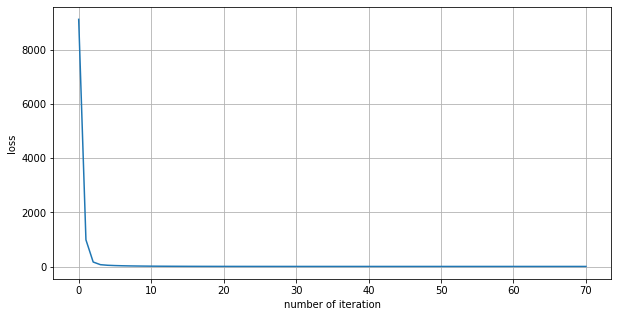

In [166]:
# PLAYGROUND
# you can do anything here as long as not adding any new import
global w

w, features, label = [2, 2, 2, 2, 2], features, label

history = []
print('cost func before', cost_func_linreg(features, label))
print('weight before', w)

number_of_iteration = 0

# bagian ini dapat anda modifikasi sesuai dengan fungsi is_convergen yang telah dibuat diatas
while not is_convergen(history, number_of_iteration):
    history.append(cost_func_linreg(features, label)) 
    w = SGD(features, label, lr=0.001)
    number_of_iteration += 1
    
print('cost func after ' + str(number_of_iteration) + ' iteration ' + str(cost_func_linreg(features, label)))
print('weight after ' + str(number_of_iteration) + ' iteration ' + str(w))

print(history)

print('\ncost/loss func plot')
plt.figure(figsize=(10,5))
plt.plot(history)
plt.xlabel('number of iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()


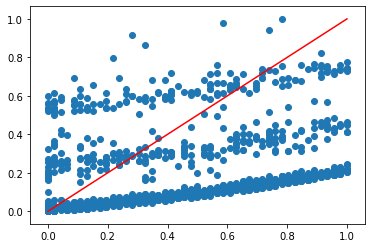

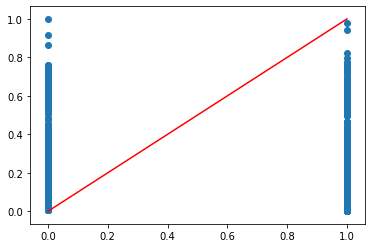

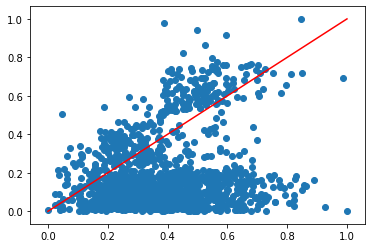

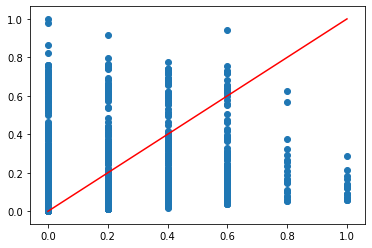

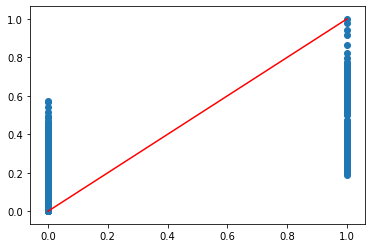

In [167]:
# visualisasikan variabel charges dan 1 fitur yang menurut Anda berpengaruh paling besar pada charges kedalam 2D plot

def linreg_plot(feature, label):
    plt.scatter(feature, label)
    plt.plot([min(feature), max(feature)], [min(label), max(label)], color='red') # predicted
    plt.show()

dt_features = pd.DataFrame(np.array(features), columns=data_linreg.columns[:-1])

# Ambil fitur yang Anda pilih dari dt_features dengan mengganti "FITUR X"

# melihat plotting dari tiap fitur yang ada pada dataset
for i in dt_features.columns:
    feature = dt_features[i].to_numpy()
    linreg_plot(feature, label)

## Soal 2 
### Analisis Linear Regression (5 poin)
* Jelaskan secara singkat analisis Anda terhadap hasil Linear Regression yang didapatkan

## JAWABAN

Linear Regression sangat terpengaruh dari weight yang diberikan. Weight yang tepat akan menjadikan iterasi makin sedikit untuk mendapatkan konvergensi (semakin cepta). Pada solusi saya, sesuatu lain yang mempengaruhi kecepatan konvergensi adalah standarisasi dan normalisasi

## Soal 3  
### Logistic Regression (20 poin)
* Pada soal ini Anda diminta untuk mengimplementasikan Logistic Regression untuk klasifikasi pasien liver atau non liver, jika diketahui atribut-atribut yang ada pada pasien_liver.csv

In [122]:
data_logreg = pd.read_csv("pasien_liver.csv", header=None)
data_logreg.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,30,Female,0.7,0.2,63.0,31.0,27,5.8,3.4,1.40,1
1,29,Male,1.0,0.3,75.0,25.0,26,5.1,2.9,1.30,1
2,50,Male,7.3,3.7,92.0,44.0,236,6.8,1.6,0.30,1
3,45,Male,1.1,0.4,92.0,91.0,188,7.2,3.8,1.11,1
4,52,Male,1.8,0.8,97.0,85.0,78,6.4,2.7,0.70,1
5,40,Male,0.6,0.1,98.0,35.0,31,6.0,3.2,1.10,1
6,58,Male,0.4,0.1,100.0,59.0,126,4.3,2.5,1.40,1
7,72,Male,0.6,0.1,102.0,31.0,35,6.3,3.2,1.00,1
8,62,Male,5.0,2.1,103.0,18.0,40,5.0,2.1,1.72,1
9,35,Male,26.3,12.1,108.0,168.0,630,9.2,2.0,0.30,1


Silahkan melakukan preprocessing data jika diperlukan. Anda bisa menggunakan preprocessing yang telah Anda lakukan pada PR 1

In [137]:
# PREPROCESSING DATA
df1 = data_logreg.dropna()

# merubah nominal value ke numeric values
if (df1[1].dtypes == 'O'):
    df1[1][df1[1] == "Male"] = 1
    df1[1][df1[1] == "Female"] = 0

# standarisasi dataset 
df1 = (df1-df1.min())/(df1.max()-df1.min())
# normalisasi dataset
# df1 = (df1 - df1.mean()) / df1.std()

data_logreg = df1

c:\users\irfanazizalamin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\irfanazizalamin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [138]:
data_logreg.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.320988,0,0.011194,0.007874,0.000000,0.016935,0.003456,0.392857,0.625,0.500000,0.0
1,0.308642,1,0.022388,0.015748,0.005862,0.012097,0.003253,0.267857,0.500,0.454545,0.0
2,0.567901,1,0.257463,0.283465,0.014167,0.027419,0.045944,0.571429,0.175,0.000000,0.0
3,0.506173,1,0.026119,0.023622,0.014167,0.065323,0.036186,0.642857,0.725,0.368182,0.0
4,0.592593,1,0.052239,0.055118,0.016610,0.060484,0.013824,0.500000,0.450,0.181818,0.0


In [139]:
# Pembagian fitur dan label
classification_data = data_logreg.drop([10], axis=1).values
classification_label = data_logreg[10].values

In [140]:
# merubah tipe data dari object ke float untuk perhitungan selanjutnya
classification_data = classification_data.astype('float64')

In [141]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # membuat sigmoid function
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # untuk mengevaluasi seberapa baik algoritma spesifik memodelkan dari data yang diberikan
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # proses pembuatan algo machinenya
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # inisiasi weights 
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # akan memberikan probability 1 (in range).
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    # akan memberikan either 0 or 1 sebagai output
    def predict(self, X):
        return self.predict_prob(X).round()

In [142]:
model = LogisticRegression(lr=0.1, num_iter=300000)
%time model.fit(classification_data, classification_label)

Wall time: 22.4 s


### Implementasi Logistic Regression Model dalam training dan testing data
* Silahkan melakukan pembagian data untuk training dan testing (default 60:40)

In [143]:
from random import seed
from random import randrange
from numpy import empty

# Split a dataset into a train and test set
def train_test_split(data, label, split=0.60):
    train_data = []
    train_label = []
    train_size = split * len(data)
    data_copy = data.tolist()
    label_copy = label.tolist()
    while len(train_data) < train_size:
        index = randrange(len(data_copy))
        train_data.append(data_copy.pop(index))
        train_label.append(label_copy.pop(index))
    
    train_data = np.array(train_data)
    train_label = np.array(train_label)
    data_copy = np.array(data_copy)
    label_copy = np.array(label_copy)
    return train_data, train_label, data_copy, label_copy  

In [144]:
# test train/test split
seed(5)
x_train_clf, y_train_clf, x_val_clf, y_val_clf = train_test_split(classification_data, classification_label)

In [145]:
# PLAYGROUND
# you can do anything here as long as not adding any new import

logreg_model = LogisticRegression(lr=0.1, num_iter=300000)
logreg_model.fit(x_train_clf, y_train_clf)

## Evaluasi

In [146]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("* Confusion Matrix") 
    print(pd.DataFrame(confusion_matrix(y_test, y_pred), \
            index = ['Actual Pasien Liver', 'Actual Pasien Non-Liver'], \
            columns = ['Pred Pasien Liver', 'Pred Pasien Non-Liver'])) 
      
    print ("\n* Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("\n* Classification Report :\n", 
    classification_report(y_test, y_pred)) 

In [147]:
logreg_y_predict = (logreg_model.predict(x_val_clf))

In [148]:
cal_accuracy(y_val_clf, logreg_y_predict)

* Confusion Matrix
                         Pred Pasien Liver  Pred Pasien Non-Liver
Actual Pasien Liver                     19                     17
Actual Pasien Non-Liver                 13                     27

* Accuracy :  60.526315789473685

* Classification Report :
               precision    recall  f1-score   support

         0.0       0.59      0.53      0.56        36
         1.0       0.61      0.68      0.64        40

    accuracy                           0.61        76
   macro avg       0.60      0.60      0.60        76
weighted avg       0.60      0.61      0.60        76



## Soal 4  
### Analisis Logistic Regression (5 poin)
1. Jelaskan secara singkat analisis Anda terhadap hasil Logistic Regression yang didapatkan
2. Jelaskan secara singkat perbedaan hasil evaluasi dari Decision Tree pada PR 1 dan Logistic Regression yang didapatkan pada soal 3 dan mengapa perbedaan tersebut bisa terjadi

## JAWABAN

1. Dari learning rate yang sama, banyaknya jumlah iterasi belum tentu akan menjadikan akurasi yang tinggi. Sedangkan, jika learning rate nya kecil, maka dibutuhkan iterasi yang lebih banyak untuk menghasilkan akurasi yang lebih tinggi
2. Hasil evalaluasi menggunakan Decision Tree menunjukkan angka akurasi yang lebih baik dibandingkan menggunakan Logistic Regression. Hal ini dikarenakan dataset yang ada memiliki dimensi lebih dari dua. Dimana decision tree membagi wilayah yang lebih keci dan lebih kecil lagi, sedangkan pada Logistic Regression cocokya untuk membagi ruang(kelompok) tepat menjadi 2

sources: 
- https://blog.bigml.com/2016/09/28/logistic-regression-versus-decision-trees/
